# EEG data exploration

## Load libraries

### Core

In [2]:
import io

### Data Science

In [3]:
import numpy as np
import scipy 

### Visualizations

In [4]:
import matplotlib.pyplot as plt

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
from hypyp.ext.mpl3d import glm
from hypyp.ext.mpl3d.mesh import Mesh
from hypyp.ext.mpl3d.camera import Camera

### MNE

In [5]:
import mne

### HyPyP

In [ ]:
from hypyp import prep 
from hypyp import analyses
from hypyp import stats
from hypyp import viz

## Read Raw Data

In [21]:
def read_data(path):
    data = mne.io.read_raw_bdf(path, preload = True)
    return data

dyad_01_path = "/home/agata/Desktop/thesis/Dyad01_RestingState1.bdf"
dyad_02_path = "/home/agata/Desktop/thesis/Dyad02_restingstate1.bdf"
dyad_01 = read_data(dyad_01_path)
dyad_02 = read_data(dyad_02_path)

Extracting EDF parameters from /home/agata/Desktop/thesis/Dyad01_RestingState1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 385023  =      0.000 ...   188.000 secs...


/tmp/ipykernel_4467/3239997685.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'1-EMPTY', '2-EMPTY'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_bdf(path, preload = True)


Extracting EDF parameters from /home/agata/Desktop/thesis/Dyad02_restingstate1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 430079  =      0.000 ...   210.000 secs...


/tmp/ipykernel_4467/3239997685.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'1-EMPTY', '2-EMPTY'}. Applying running numbers for duplicates.
  data = mne.io.read_raw_bdf(path, preload = True)


### View data attributes

Dyad 1
- 192 EEG channels
- 1 stimulus
- sampling rate: 2048 Hz (data point every 0.5 ms)
- data were filtered during data collection between 0.00 – 417.00 Hz 

In [7]:
dyad_01.info

<Info | 7 non-empty values
 bads: []
 ch_names: 1-Fp1, 1-AF7, 1-AF3, 1-F1, 1-F3, 1-F5, 1-F7, 1-FT7, 1-FC5, ...
 chs: 192 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2021-05-21 14:06:21 UTC
 nchan: 193
 projs: []
 sfreq: 2048.0 Hz
>

In [8]:
# all fields available in info
dyad_01.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

### Extract epochs

In [59]:
events = mne.find_events(dyad_01, initial_event = True)

3 events found
Event IDs: [    1     2 65536]


In [98]:
event_id = {'event1': 1, 'event2': 2, 'event3': 65536}
tmin = -0.5
tmax = 0.5
epochs = mne.Epochs(dyad_01, events, event_id, tmin, tmax, preload=True)


Not setting metadata
3 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3 events and 2049 original time points ...
1 bad epochs dropped


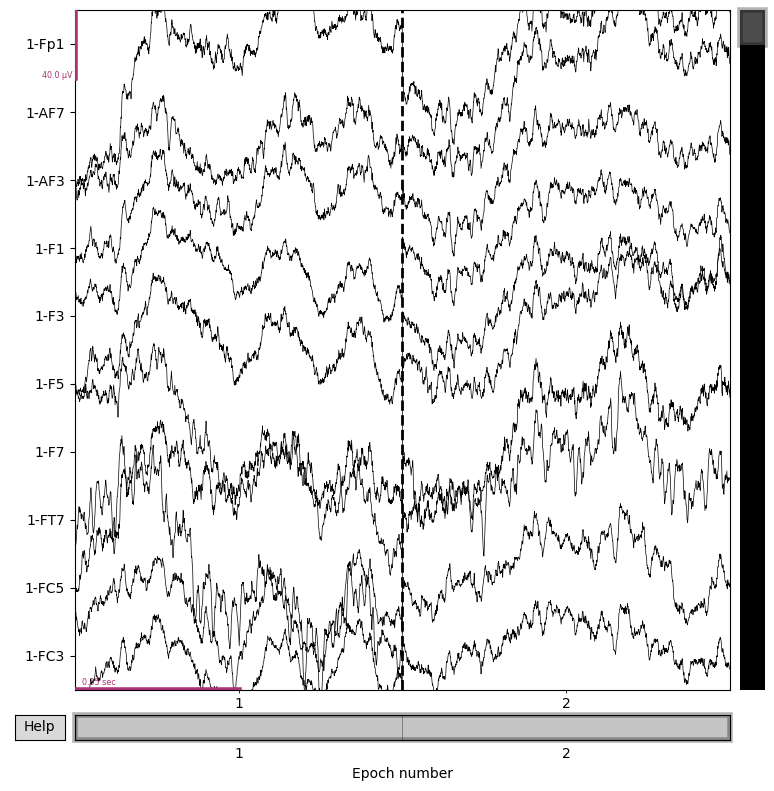

In [68]:
epochs.plot(n_epochs=10, n_channels=10);

## Visualizing Raw EEG Data

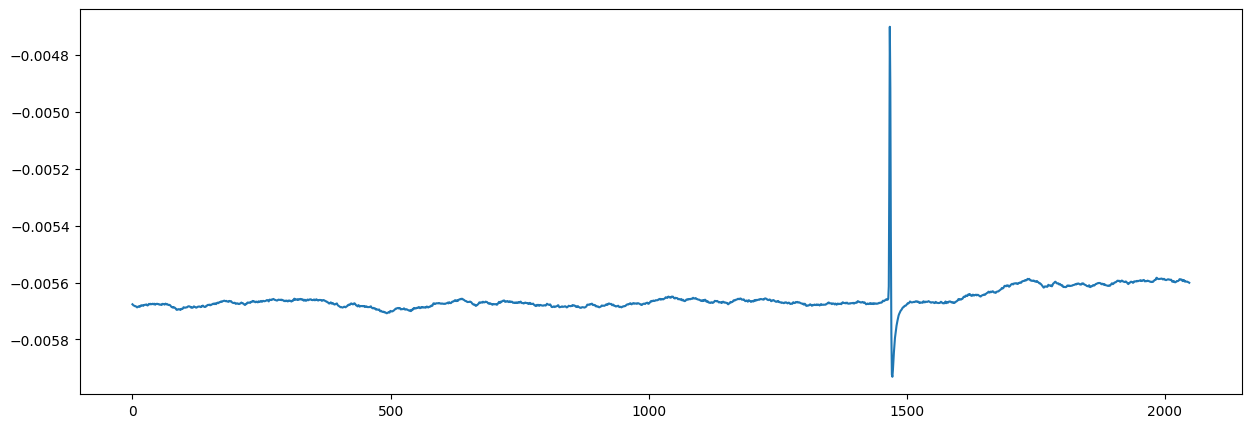

In [61]:
fig, ax = plt.subplots(figsize=[15, 5])
start_time = 15
end_time = 16

ax.plot(dyad_01.get_data(picks='1-Fp1', tmin=start_time, tmax=end_time).T)
plt.show()

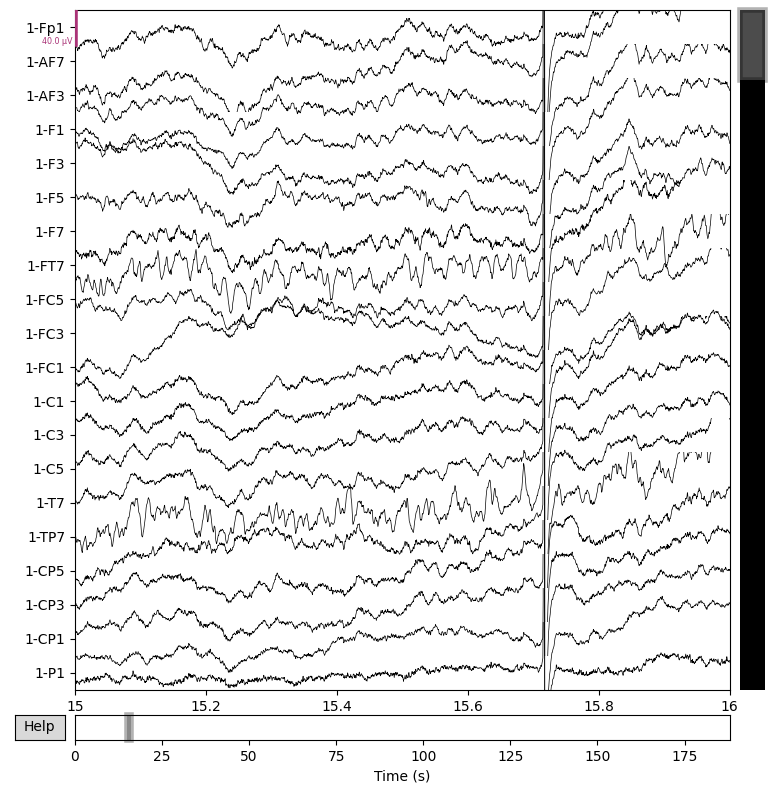

In [60]:
# using .plot method available for MNE data classes
dyad_01.plot(start = 15, duration = 1);

### Renaming channels

In [92]:
old_channels = list(filter(lambda x: "EMPTY" not in x, dyad_01.info["ch_names"]))
new_channels = [chan[2::] if chan[0:2] == "1-" or chan[0:2] == "2-" else chan for chan in old_channels]
old_to_new = {}
for old, new in zip(old_channels, new_channels):
    old_to_new[old] = new

mne.rename_channels(dyad_01.info, mapping = old_to_new, allow_duplicates = True)

/tmp/ipykernel_4467/1189146646.py:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'P10', 'Oz', 'C5', 'AF4', 'AFz', 'C6', 'PO7', 'P6', 'AF7', 'FT8', 'CP2', 'POz', 'PO3', 'P3', 'O1', 'Fpz', 'AF8', 'FCz', 'PO8', 'P9', 'TP7', 'Iz', 'F2', 'Fp1', 'F8', 'CP4', 'CP3', 'Fz', 'P8', 'Fp2', 'FC4', 'F6', 'FC6', 'P5', 'T8', 'P4', 'M2', 'C3', 'CP1', 'P1', 'HR2', 'M1', 'FC1', 'C1', 'CP5', 'P7', 'FC2', 'C2', 'HR1', 'P2', 'CPz', 'F4', 'FT7', 'Pz', 'F1', 'FC5', 'CP6', 'F5', 'T7', 'AF3', 'TP8', 'F3', 'Cz', 'F7', 'FC3', 'O2', 'PO4', 'C4'}. Applying running numbers for duplicates.
  mne.rename_channels(dyad_01.info, mapping = old_to_new, allow_duplicates = True)


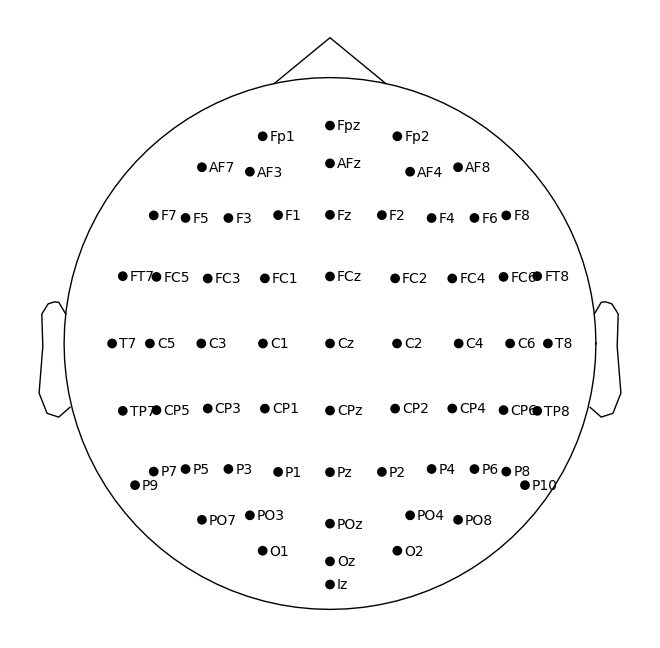

AssertionError: 

In [57]:
import re
# Form the 10-20 montage
mont1020 = mne.channels.make_standard_montage('biosemi64')

# Choose what channels you want to keep 
# Make sure that these channels exist e.g. T1 does not exist in the standard 10-20 EEG system!
r_i = re.compile("^1-")
r_m = re.compile("^2-")
infant_channels = [chan[2::] for chan in list(filter(r_i.match, dyad_01.info["ch_names"])) if "EMPTY" not in chan]
mother_channels = [chan[2::] for chan in list(filter(r_m.match, dyad_01.info["ch_names"])) if "EMPTY" not in chan]

ind = [i for (i, channel) in enumerate(mont1020.ch_names) if channel in infant_channels]
mont1020_new = mont1020.copy()

# Keep only the desired channels
mont1020_new.ch_names = [mont1020.ch_names[x] for x in ind]
kept_channel_info = [mont1020.dig[x+3] for x in ind]

# Keep the first three rows as they are the fiducial points information
mont1020_new.dig = mont1020.dig+kept_channel_info
mont1020.plot()
mont1020_new.plot()

In [82]:
dyad_01.info['dig']

[<DigPoint |        LPA : (-86.1, -0.0, 0.0) mm     : head frame>,
 <DigPoint |     Nasion : (0.0, 86.1, 0.0) mm       : head frame>,
 <DigPoint |        RPA : (86.1, 0.0, 0.0) mm       : head frame>]